In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


In [87]:
file_path = r"D:\Coursera GOOGLE data analysics\Tu hoc DA\Porfolio Projects\Retail\online_retail.csv"

df = pd.read_csv(file_path)
df.head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### DATA EXPLORATION

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


###### There are missing data on columns: CustomerID and Description. 
###### Let's start by converting CustomerID and InvoiceDate to the correct format

In [89]:
df = df.drop(columns=['index'])
df['CustomerID'] = df['CustomerID'].astype('Int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.0
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.69057
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.0
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.0
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.0
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.0
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.0
std,218.081158,NaN,96.759853,1713.600303


###### Quantity and UnitPrice have negative values

###### Investigate negative Quantity and UnitPrice

In [90]:
# Filter rows with negative UnitPrice

print(f"Number of negative values in UnitPrice: {(df['UnitPrice'] < 0).sum()}\n")
df[df['UnitPrice'] < 0].head()

# "Adjust bad debt" refers to making accounting adjustments,ensures accurate financial reporting and aligns revenue with actual cash flow.

Number of negative values in UnitPrice: 2



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


In [91]:
# Count and remove rows where UnitPrice equals zero, as they do not contribute to revenue

zero_price_count = (df['UnitPrice'] == 0).sum()
print(f"Number of rows with UnitPrice = 0: {zero_price_count}")

df = df[df['UnitPrice'] != 0].reset_index(drop=True)


Number of rows with UnitPrice = 0: 2515


In [92]:
# Filter rows with negative Quantity

print(f"Number of negative values in Quantity: {(df['Quantity'] < 0).sum()}\n")
df[df['Quantity'] < 0]


Number of negative values in Quantity: 9288



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
537934,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
539026,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
539200,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
539201,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


###### We notice InvoiceNo from these transactions start with letter A or C, indicate cancellation or adjustment activities. We tend to keep these entries for accurate revenue analysis
###### Let's count number of cancellation invoices/adjustment and other transactions


In [93]:
def categorize_transaction(invoice_no):
    if invoice_no[0] == 'C':
        return 'Cancellation'
    elif invoice_no[0] == 'A':
        return 'Adjustment'
    elif invoice_no[0].isdigit(): 
        return 'Purchase'
    else:
        return 'Other'

df['TransactionType'] = df['InvoiceNo'].apply(categorize_transaction)

df[['TransactionType']].value_counts()

TransactionType
Purchase           530103
Cancellation         9288
Adjustment              3
Name: count, dtype: int64

###### It was only 2 Adjustment transactions as earlier found?

In [94]:
df[df['TransactionType'] == 'Adjustment']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionType
298274,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,<NA>,United Kingdom,Adjustment
298275,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,Adjustment
298276,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,Adjustment


######  We observe that these three transactions occurred within a two-minute window, suggesting they may be corrections of prior errors. To confirm this, we'll consult with our accounting team. 
###### Next, we'll take a closer look into cancellation trend.

##### Display the daily trend of cancellations

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


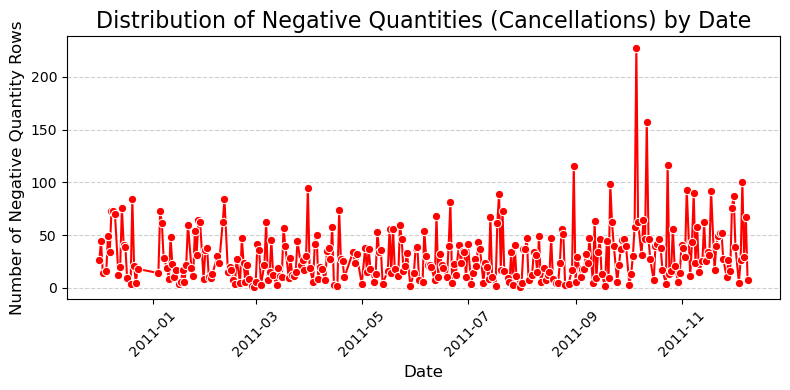

In [95]:
negative_quantity_rows = df[df['Quantity']<0]
cancellations_by_date = negative_quantity_rows.groupby(negative_quantity_rows['InvoiceDate'].dt.date).size()
# Unlike .count(), which counts non-null values in a specific column, .size() counts all rows, including NaNs.

plt.figure(figsize=(8, 4))
sns.lineplot(x=cancellations_by_date.index, y=cancellations_by_date.values, color='red', marker='o')
plt.title("Distribution of Negative Quantities (Cancellations) by Date", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Negative Quantity Rows", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###### Upon reviewing the chart, it's evident that cancellation rates peaked in October. This surge may be linked to a specific event during that time. However, without additional context or data, it's challenging to pinpoint the exact cause. Further investigation into events or promotions during October could provide more insights into this trend.

### DATA CLEANING

##### Handling missing CustomerID

                 Count  Percentage
Country                           
United Kingdom  131127   24.310059
EIRE               709    0.131444
Hong Kong          288    0.053393
Unspecified        202    0.037449
Switzerland        125    0.023174
France              66    0.012236
Israel              47    0.008713
Portugal            39    0.007230
Bahrain              2    0.000371


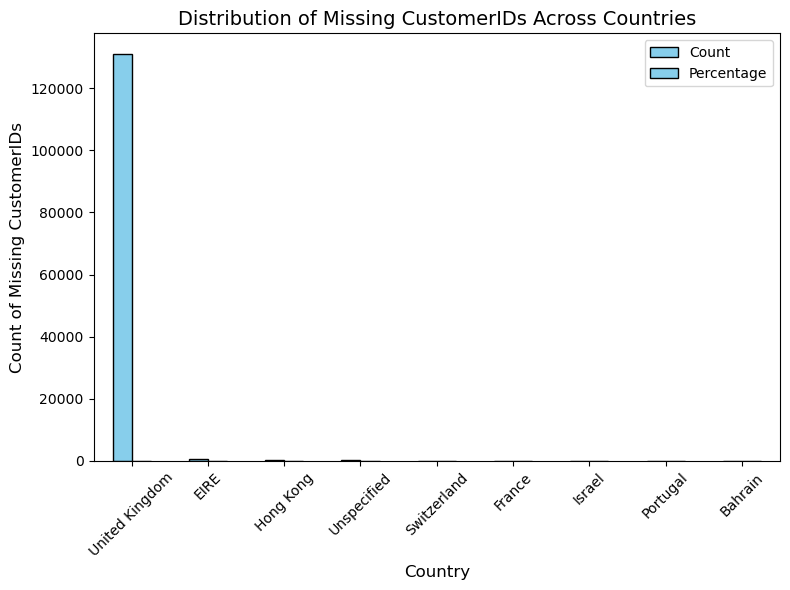

In [96]:
df_missing_customerid = df[df['CustomerID'].isnull()]
missing_customerid_by_country = df_missing_customerid['Country'].value_counts(ascending = False)
missing_customerid_percentage = (missing_customerid_by_country / len(df)) * 100

# Combine both into a single DataFrame for better visualization
missing_customerid_distribution = pd.DataFrame({
    'Count': missing_customerid_by_country,
    'Percentage': missing_customerid_percentage
})

# Display the top 10 countries with the most missing CustomerIDs
print(missing_customerid_distribution.head(10))

# Plot the distribution
missing_customerid_distribution.sort_values('Count', ascending=False).plot(
    kind='bar', figsize=(8, 6), color='skyblue', edgecolor='black'
)
plt.title('Distribution of Missing CustomerIDs Across Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of Missing CustomerIDs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

######  United Kingdom with a 24.6% missing CustomerID rate, further investigation into why this data is missing would be necessary. This could involve looking into the nature of the transactions e.g., cancellations, non-registered customer, in-store purchases) or system/process issues that caused the missing values. 
###### But for now, let's move on with the analysis by assigning placeholder to these missing entries, dropping them could significantly impact the sales analysis, especially  for the UK 

In [97]:
df['CustomerID'].fillna(-1, inplace=True)
df.isnull().sum()


InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
TransactionType    0
dtype: int64

##### Handling missing Description

In [98]:
df['Description'] = df['Description'].fillna('missing description')
df.isnull().sum()


InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
TransactionType    0
dtype: int64

### FEATURE ENGINEERING

##### Create Total Revenue Column

In [99]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

##### Extract Date Features

In [100]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [101]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TransactionType', 'TotalRevenue',
       'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'YearMonth'],
      dtype='object')

##### Outlier Detection

### SALES ANALYSIS

##### Revenue Trends

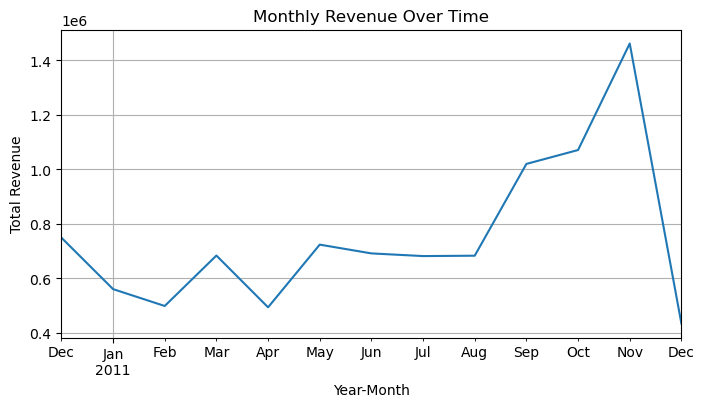

In [102]:
# Calculate total revenue per month
monthly_revenue = df.groupby('YearMonth')['TotalRevenue'].sum()

# Plotting
plt.figure(figsize=(8, 4))
monthly_revenue.plot()
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

##### Top Products

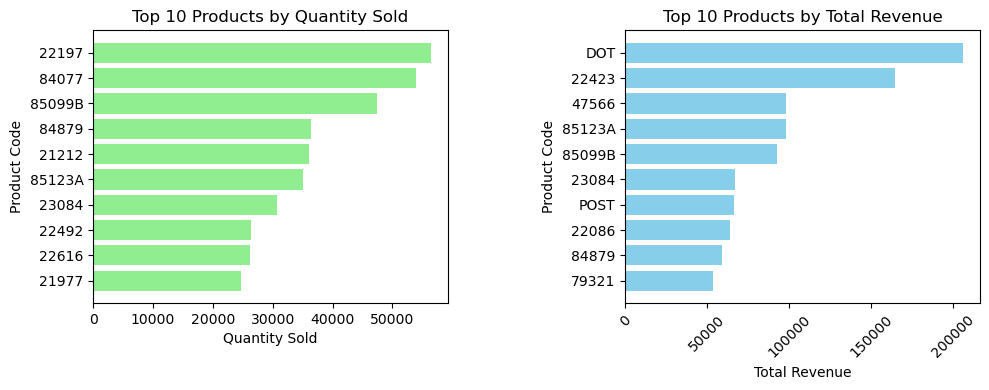

In [103]:
# Calculate total revenue and quantity sold per product
product_performance = df.groupby('StockCode').agg({
    'TotalRevenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Identify top 10 products by Total Revenue
top_products_by_revenue = product_performance.sort_values(by='TotalRevenue', ascending=False).head(10)

# Identify top 10 products by Quantity Sold
top_products_by_quantity = product_performance.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 4))

# Plot Top 10 Products by Quantity Sold 
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.barh(top_products_by_quantity['StockCode'], top_products_by_quantity['Quantity'], color='lightgreen')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Code')
plt.title('Top 10 Products by Quantity Sold')
plt.gca().invert_yaxis()

# Plot Top 10 Products by Total Revenue
plt.subplot(1, 2, 2)
plt.barh(top_products_by_revenue['StockCode'], top_products_by_revenue['TotalRevenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Code')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.subplots_adjust(wspace=0.5) 
plt.show()


##### Bottom Products

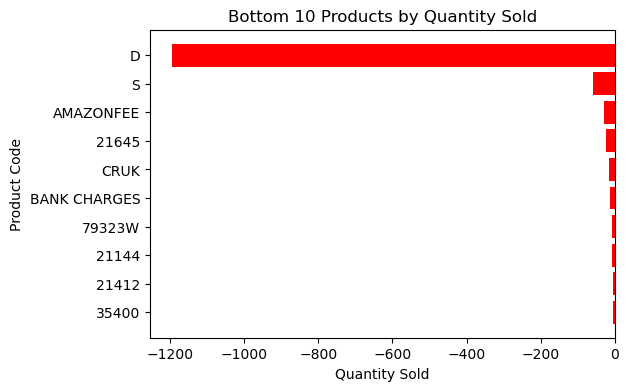

In [104]:
bottom_products_by_quantity = product_performance.sort_values(by='Quantity').head(10)

# Plotting bottom 10 Products by Quantity Sold
plt.figure(figsize=(6, 4))
plt.barh(bottom_products_by_quantity['StockCode'], bottom_products_by_quantity['Quantity'], color='red')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Code')
plt.title('Bottom 10 Products by Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

###### Are negative-quantity items due to cancel transactions?

In [105]:
negative_quantity =df[df['Quantity']<0]
negative_quantity['TransactionType'].value_counts()

TransactionType
Cancellation    9288
Name: count, dtype: int64

##### Sales by Country

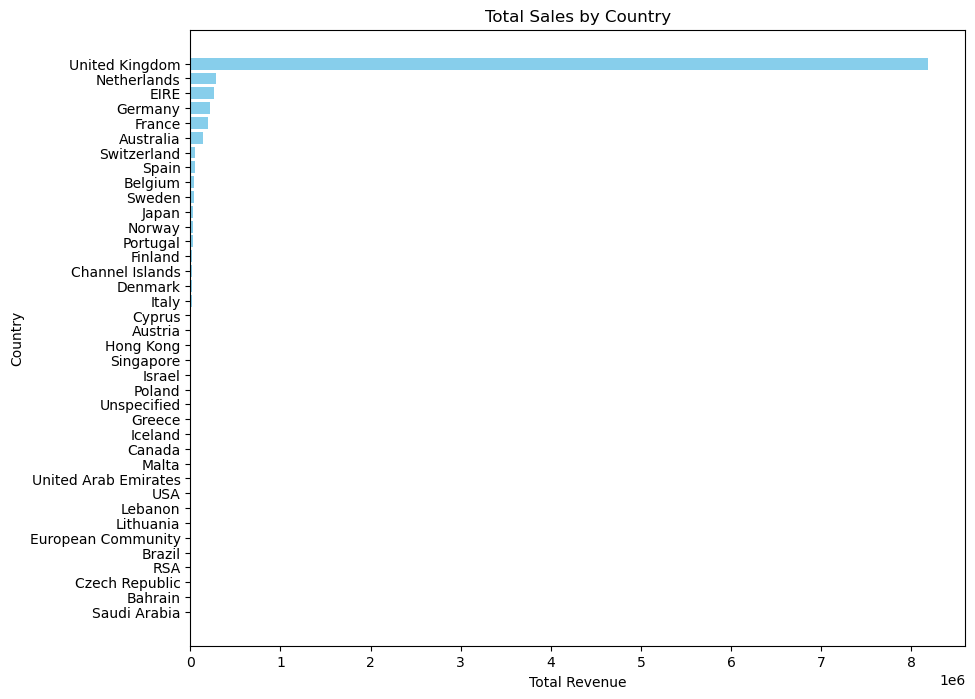

In [106]:
sales_by_country = df.groupby('Country')['TotalRevenue'].sum().reset_index()
sales_by_country_sorted = sales_by_country.sort_values('TotalRevenue', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(sales_by_country_sorted['Country'], sales_by_country_sorted['TotalRevenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Total Sales by Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales at the top
plt.show()



### CUSTOMER ANALYSIS

###### Firstly, drop all customers with CustomerID = -1 in dataset to ensure accurate customer analysis, as it represents missing customer information

In [107]:
df_valid_cus = df[df['CustomerID'] != -1]
df_valid_cus = df_valid_cus.copy()

In [108]:
# See proportion of rows that were dropped from df
len(df_valid_cus)/len(df)

0.7541592972854723

##### Customer Monthly Purchase Frequency

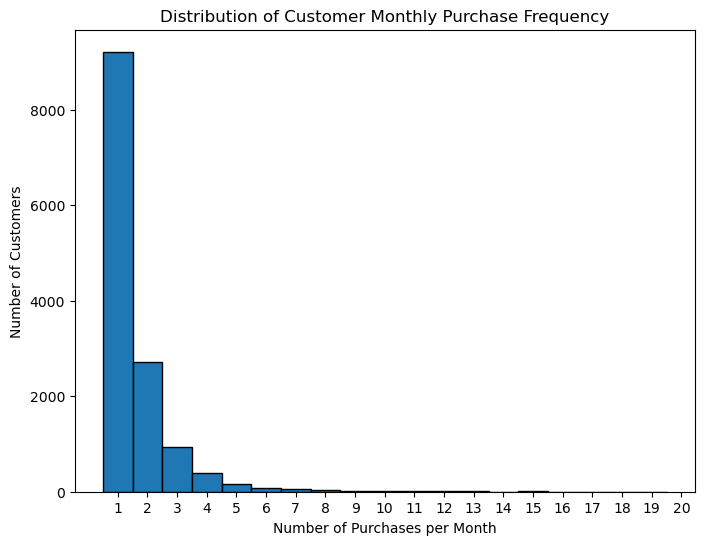

In [109]:
# Count purchases per customer per month
monthly_purchase_frequency = df_valid_cus.groupby(['CustomerID', 'YearMonth'])['InvoiceNo'].nunique().reset_index()

# Rename columns InvoiceNo
monthly_purchase_frequency.rename(columns={'InvoiceNo': 'MonthlyPurchaseFrequency'}, inplace=True)

# Plotting the Purchase Frequency distribution for all customers
plt.figure(figsize=(8, 6))
plt.hist(monthly_purchase_frequency['MonthlyPurchaseFrequency'], bins=range(1, 21), edgecolor='black', align='left')
plt.title('Distribution of Customer Monthly Purchase Frequency')
plt.xlabel('Number of Purchases per Month')
plt.ylabel('Number of Customers')
plt.xticks(range(1, 21))
plt.show()


##### Customer Segmentation RFM

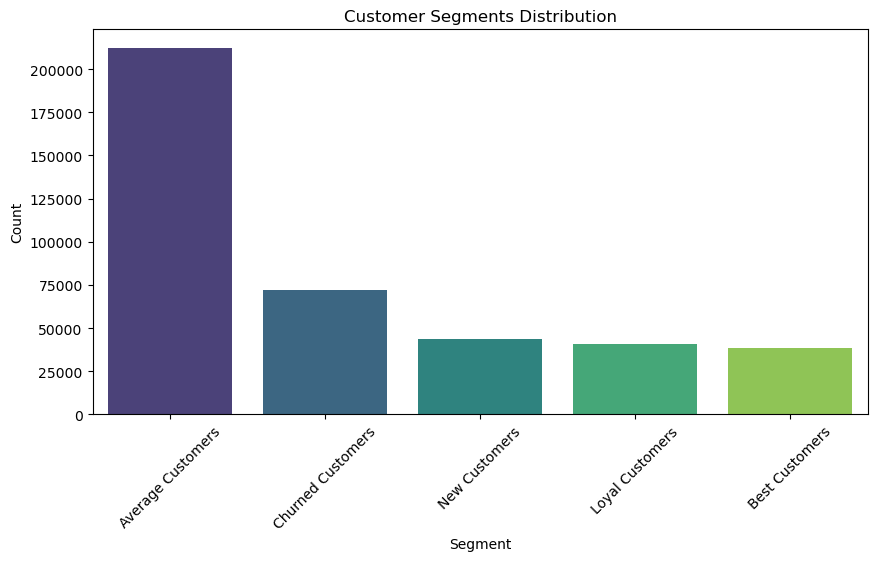

In [110]:
last_purchase_date = df_valid_cus['InvoiceDate'].max()  # Most recent date in the dataset

# Calculated Recency, Frequency, and Monetary (RFM) values 
df_valid_cus['Recency'] = (last_purchase_date - df_valid_cus['InvoiceDate']).dt.days  # days since last purchase
df_valid_cus['Frequency'] = df_valid_cus.groupby('CustomerID')['InvoiceNo'].transform('count')  # number of transactions
df_valid_cus['Monetary'] = df_valid_cus.groupby('CustomerID')['TotalRevenue'].transform('sum')  # total revenue spent

# Rank customers by Recency (lower is better); Frequency, and Monetary (higher is better)
df_valid_cus['R_Score'] = pd.qcut(df_valid_cus['Recency'], q=4, labels=[4, 3, 2, 1])
df_valid_cus['F_Score'] = pd.qcut(df_valid_cus['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
df_valid_cus['M_Score'] = pd.qcut(df_valid_cus['Monetary'].rank(method='first'), q=4, labels=[1, 2, 3, 4])

# Create RFM Score (combine all three scores)
df_valid_cus['RFM_Score'] = df_valid_cus['R_Score'].astype(str) + df_valid_cus['F_Score'].astype(str) + df_valid_cus['M_Score'].astype(str)

# Categorize customers based on their RFM score
def classify_customer(row):
    if row['RFM_Score'] in ['444', '443', '434', '433']:
        return 'Best Customers'
    elif row['RFM_Score'] in ['344', '343', '334', '333']:
        return 'Loyal Customers'
    elif row['RFM_Score'] in ['144', '143', '134', '133']:
        return 'New Customers'
    elif row['RFM_Score'] in ['411', '311', '211', '111']:
        return 'Churned Customers'
    else:
        return 'Average Customers'

df_valid_cus['Customer_Segment'] = df_valid_cus.apply(classify_customer, axis=1)

# Distribution of customer types
plt.figure(figsize=(10, 5))
sns.countplot(data=df_valid_cus, x='Customer_Segment', order=df_valid_cus['Customer_Segment'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()


###### Summary Statistics

In [111]:
# Perform the aggregation
aggregated_df = df_valid_cus[["Customer_Segment", "Recency", "Frequency", "Monetary"]] \
    .groupby('Customer_Segment').agg(['mean', 'median', 'count', 'std']).reset_index()
aggregated_df

Customer_Segment     Recency                               Frequency  \
                            mean median   count         std         mean   
0  Average Customers  155.246426  155.0  212364  102.561916   407.652394   
1     Best Customers   22.106105   22.0   38330   13.820489  1861.584633   
2  Churned Customers  148.925645  120.0   71885  114.370852    43.034263   
3    Loyal Customers   87.301524   86.0   40806   23.815192  1592.026491   
4      New Customers  310.347364  310.0   43404   39.897268  1106.516035   

                                   Monetary                                 
  median   count          std          mean   median   count           std  
0  168.0  212364  1022.185050   6536.844581  2154.68  212364  20535.738487  
1  612.0   38330  2332.668047  24896.315346  7187.34   38330  40652.550815  
2   41.0   71885    22.185128    519.388128   477.91   71885    280.498332  
3  519.0   40806  2201.039336  28776.386079  7170.70   40806  50009.204346  
4  474.0   43404  1610.557331  21809.075178  6989.63   43404  42089.754908

##### Customer Lifetime Value (CLV) Calculation: Predict long-term customer value

##### Churn Analysis - Predicting which Customers are likely to leave

In [112]:
# Define churn
df_valid_cus['Churn'] = df_valid_cus['Customer_Segment'].apply(lambda x: 1 if x == 'Churned Customers' else 0)

Churn
0    82.33
1    17.67
Name: proportion, dtype: float64


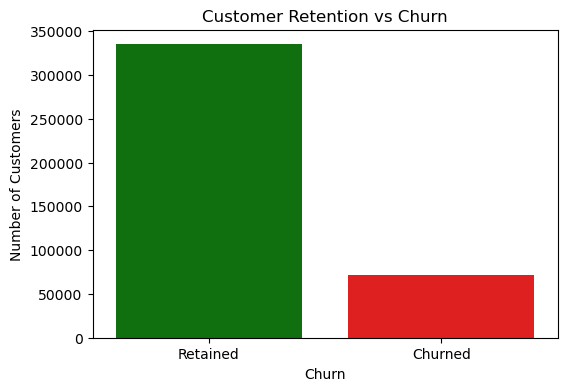

In [113]:
retention_counts = df_valid_cus['Churn'].value_counts()
retention_rate = (df_valid_cus['Churn'].value_counts(normalize=True) * 100).round(2)
print(retention_rate)

plt.figure(figsize=(6, 4))
sns.barplot(x=retention_counts.index, y=retention_counts.values, palette=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Retained", "Churned"])
plt.ylabel("Number of Customers")
plt.title("Customer Retention vs Churn")
plt.show()

In [114]:
# See churn rate for each country
churn_by_country = df_valid_cus.groupby('Country')['Churn'].mean().reset_index()

# Rename the 'Churn' column to 'Churn_Rate' for better understanding
churn_by_country.rename(columns={'Churn': 'Churn_Rate'}, inplace=True)

# Sort the countries by churn rate in descending order to see which countries have the highest churn rate
churn_by_country_sorted = churn_by_country.sort_values(by='Churn_Rate', ascending=False)

# Display the churn rate for each country
print(churn_by_country_sorted)


                 Country  Churn_Rate
2                Bahrain    1.000000
34  United Arab Emirates    1.000000
28          Saudi Arabia    1.000000
27                   RSA    1.000000
8         Czech Republic    1.000000
15                Greece    0.780822
36           Unspecified    0.450820
22                 Malta    0.354331
31                Sweden    0.292208
1                Austria    0.279302
25                Poland    0.272727
26              Portugal    0.253378
18                 Italy    0.235367
30                 Spain    0.183254
35        United Kingdom    0.182728
13                France    0.179741
12               Finland    0.169784
33                   USA    0.151203
17                Israel    0.144000
14               Germany    0.137996
9                Denmark    0.128535
32           Switzerland    0.114072
5                 Canada    0.105960
19                 Japan    0.103352
7                 Cyprus    0.102894
3                Belgium    0.097632
0

###### Investigate further: It might be helpful to explore these churned customers to understand the exact behavior leading up to their churn: What was the gap in the last purchase before they became inactive? How long did they engage with the business before churning? Was there a change in product offerings, prices, or service quality? etc...

###### Re-engagement strategy: targeting them with personalized offers or incentives may help recover these high-value customers.

In [115]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TransactionType', 'TotalRevenue',
       'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'YearMonth'],
      dtype='object')